In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import random as rd

In [2]:
fh = open("facebook_combined.txt", "rb")
G = nx.read_edgelist(fh)
fh.close()

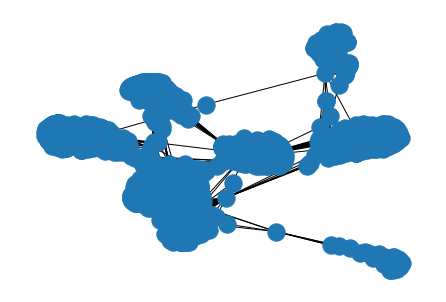

In [3]:
nx.draw(G)

## Degree and Average Degree

In [43]:
def degree_rank(Graph):
    degree_sequence = sorted((d for n, d in Graph.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure("Degree of a random graph", figsize=(10, 10))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = Graph.subgraph(sorted(nx.connected_components(Graph), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of G")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("Number of Nodes")

    fig.tight_layout()
    plt.show()

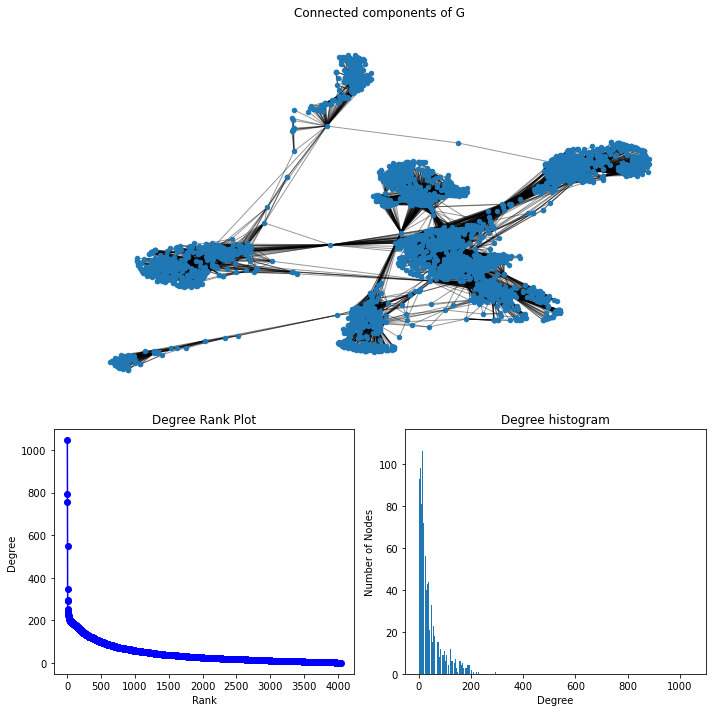

In [44]:
degree_rank(G)

In [3]:
nx.average_degree_connectivity(G)

{347: 18.959654178674352,
 17: 73.00773993808049,
 10: 86.40842105263158,
 13: 75.83739045764362,
 6: 120.46088435374149,
 20: 68.70555555555555,
 8: 93.57882882882883,
 57: 67.98245614035088,
 1: 478.02666666666664,
 31: 77.31748726655348,
 15: 71.15345911949686,
 9: 89.59777777777778,
 16: 72.2736280487805,
 65: 74.82538461538462,
 11: 85.54882154882155,
 69: 83.27329192546584,
 68: 87.53216911764706,
 5: 147.1290322580645,
 23: 70.6078753076292,
 2: 260.5408163265306,
 44: 76.02489177489177,
 24: 66.1138888888889,
 12: 85.67581300813008,
 22: 73.17388167388168,
 4: 142.31060606060606,
 7: 96.3862973760933,
 78: 86.73659673659674,
 19: 69.64473684210526,
 3: 203.87813620071685,
 26: 64.35576923076923,
 76: 92.59649122807018,
 14: 74.16420361247947,
 34: 72.12380300957592,
 21: 74.48717948717949,
 49: 92.27581941867656,
 32: 68.54758522727273,
 1045: 54.985645933014354,
 37: 66.47391577624136,
 40: 78.10648148148148,
 36: 80.7015503875969,
 62: 79.70665322580645,
 63: 85.5293305728088

## Average Clustering Coefficient

In [45]:
avg_cluster_coeff = nx.average_clustering(G)

In [46]:
def avg_Clus_Coeff(Graph):
    gc = Graph.subgraph(max(nx.connected_components(Graph)))
    lcc = nx.clustering(gc)

    cmap = plt.get_cmap('autumn')
    norm = plt.Normalize(0, max(lcc.values()))
    node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
    nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
    fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

    ax2.hist(lcc.values(), bins=50)
    ax2.set_xlabel('Clustering')
    ax2.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

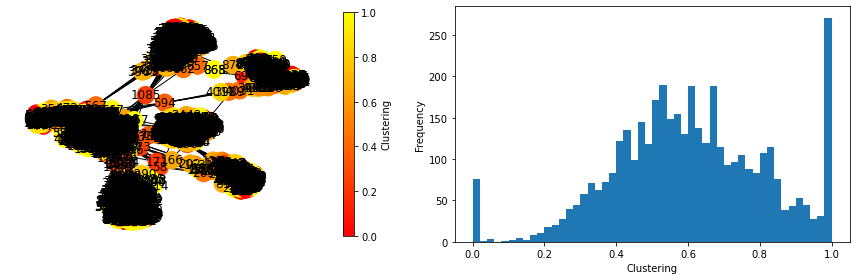

In [47]:
avg_Clus_Coeff(G)

In [12]:
print(avg_cluster_coeff)

0.6055467186200876


## Distrubution of Shortest Paths and Average Path Length

In [5]:
avg_path_length = nx.average_shortest_path_length(G)

In [8]:
shortest_path_dist = dict(nx.all_pairs_shortest_path_length(G))

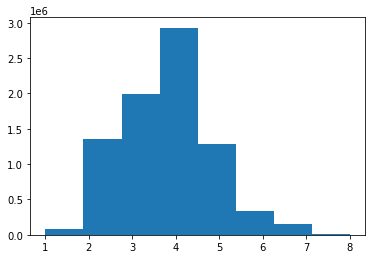

In [28]:
dist = []
for i in range(G.number_of_nodes()):
    for j in range(G.number_of_nodes()):
        if(i>j):
            dist.append(shortest_path_dist[str(i)][str(j)])

plt.hist(dist,bins = 8)
plt.show()

In [4]:
nx.diameter(G)

8

In [6]:
avg_path_length

3.6925068496963913

## Erdös-Renyi Model 

In [10]:
def Erdos_Renyi_model(N,L):
    listOfEdges = []
    while(len(listOfEdges) < L ):
        x = rd.randint(0,(N-1))
        y= rd.randint(0,(N-1))
        if(x!=y):
            if(((x,y) in listOfEdges) or ((y,x) in listOfEdges)):
                pass
            else:
                listOfEdges.append((x,y))
    
    G2 = nx.empty_graph()
    
    for i in range(N):
        G2.add_node(i)
    
    G2.add_edges_from(listOfEdges)
        
    return G2

In [11]:
graphh = Erdos_Renyi_model(1000,4000)

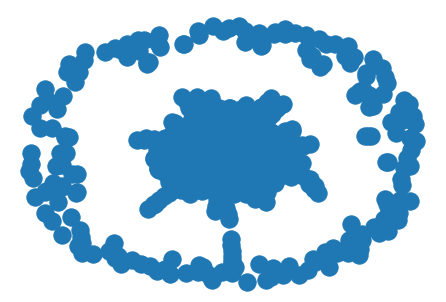

In [36]:
nx.draw(graphh)

In [40]:
def avg_Clus_Coeff(Graph):
    gc = Graph.subgraph(max(nx.connected_components(Graph)))
    lcc = nx.clustering(gc)

    cmap = plt.get_cmap('autumn')
    norm = plt.Normalize(0, max(lcc.values()))
    node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
    nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
    fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

    ax2.hist(lcc.values(), bins=50)
    ax2.set_xlabel('Clustering')
    ax2.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

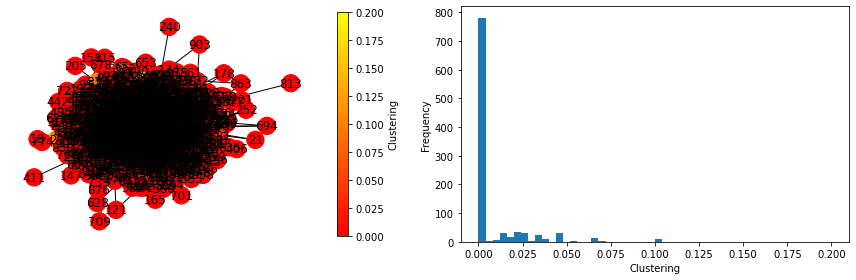

In [41]:
avg_Clus_Coeff(graphh)

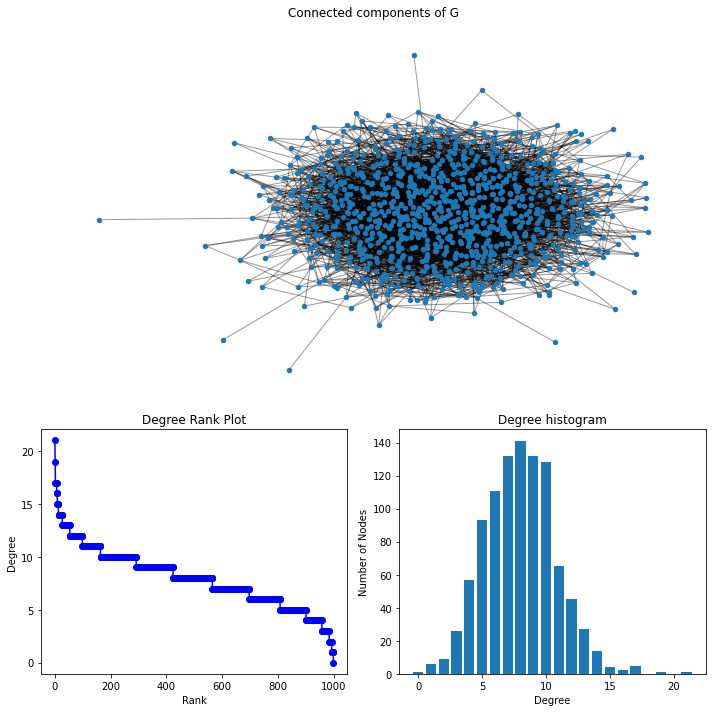

In [48]:
degree_rank(graphh)

In [8]:
def dist_shortestPath(Graph):
    shortest_path_dist = dict(nx.all_pairs_shortest_path_length(Graph))
    dist = []
    for i in range(Graph.number_of_nodes()):
        for j in range(Graph.number_of_nodes()):
            if(i>j):
                dist.append(shortest_path_dist[str(i)][str(j)])

    plt.hist(dist,bins = 8)
    plt.show()

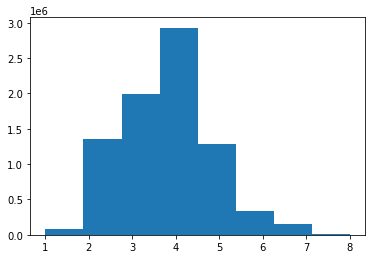

In [14]:
dist_shortestPath(G)